In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import scipy.linalg
from skimage import img_as_float
from matplotlib import rc
import os

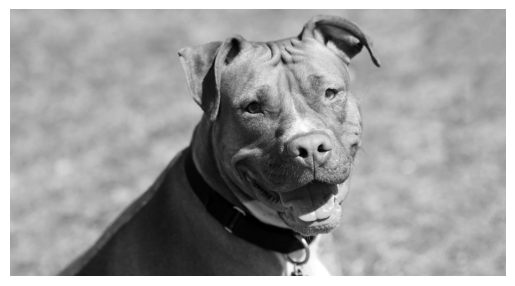

In [2]:
image = io.imread('N:\HomeWorkComputerVision\homework5\pitbull.jpg', as_gray=True)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
def compress_image(image, num_values):

    compressed_image = None
    compressed_size = 0

    u, s, v = np.linalg.svd(image)
    u_reduced = u[:,:num_values].copy()
    v_reduced = v[:num_values,:].copy()
    s_reduced = np.diag(s[:num_values])
    compressed_image = np.dot(u_reduced,np.dot(s_reduced,v_reduced))
    compressed_size = (u_reduced.shape[0] * u_reduced.shape[1]) + num_values + (v_reduced.shape[0] * v_reduced.shape[1])
    del u_reduced, v_reduced, s_reduced

    assert compressed_image.shape == image.shape, \
           "Compressed image and original image don't have the same shape"

    assert compressed_size > 0, "Don't forget to compute compressed_size"

    return compressed_image, compressed_size

Data size (original): 344000
Data size (compressed): 12310
Compression ratio: 0.035785


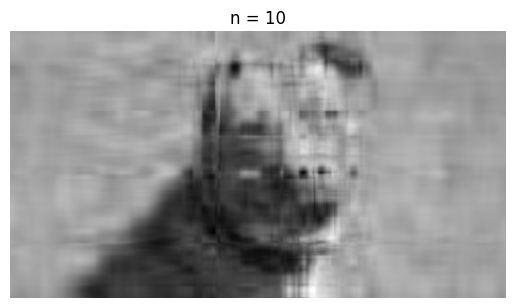

In [4]:
n = 10

compressed_image, compressed_size = compress_image(image, n)

compression_ratio = compressed_size / image.size

print("Data size (original): %d" % (image.size))
print("Data size (compressed): %d" % compressed_size)
print("Compression ratio: %f" % (compression_ratio))



plt.imshow(compressed_image, cmap='gray')
title = "n = %s" % n
plt.title(title)
plt.axis('off')
plt.show()

In [5]:
def load_dataset(data_dir, train=True, as_grey=False, shuffle=True):
    y = []
    X = []
    class_names = []

    if train:
        data_dir = os.path.join(data_dir, 'train')
    else:
        data_dir = os.path.join(data_dir, 'test')

    for i, cls in enumerate(sorted(os.listdir(data_dir))):
        for img_file in os.listdir(os.path.join(data_dir, cls)):
            img_path = os.path.join(data_dir, cls, img_file)
            img = img_as_float(io.imread(img_path, as_grey=as_grey))
            X.append(img)
            y.append(i)
        class_names.append(cls)

    X = np.array(X)
    y = np.array(y)

    if shuffle:
        idxs = np.arange(len(y))
        np.random.shuffle(idxs)
        X = X[idxs]
        y = y[idxs]

    return np.array(X), np.array(y), class_names

In [6]:
X_train, y_train, classes_train = load_dataset('faces', train=True, as_grey=True)
X_test, y_test, classes_test = load_dataset('faces', train=False, as_grey=True)

assert classes_train == classes_test
classes = classes_train

TypeError: read() got an unexpected keyword argument 'as_grey'

In [ ]:
from skimage import io, img_as_float
import os
import numpy as np

def load_dataset(data_dir, train=True, as_gray=False, shuffle=True):
    y = []
    X = []
    class_names = []

    if train:
        data_dir = os.path.join(data_dir, 'train')
    else:
        data_dir = os.path.join(data_dir, 'test')

    for i, cls in enumerate(sorted(os.listdir(data_dir))):
        for img_file in os.listdir(os.path.join(data_dir, cls)):
            img_path = os.path.join(data_dir, cls, img_file)
            img = img_as_float(io.imread(img_path, as_gray=as_gray))
            X.append(img)
            y.append(i)
        class_names.append(cls)

    X = np.array(X)
    y = np.array(y)

    if shuffle:
        idxs = np.arange(len(y))
        np.random.shuffle(idxs)
        X = X[idxs]
        y = y[idxs]

    return np.array(X), np.array(y), class_names

X_train, y_train, classes_train = load_dataset('faces', train=True, as_gray=True)
X_test, y_test, classes_test = load_dataset('faces', train=False, as_gray=True)

assert classes_train == classes_test
classes = classes_train


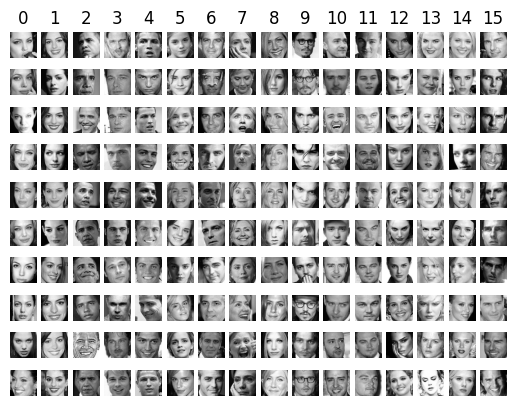

In [9]:
num_classes = len(classes)
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx], cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(y)
plt.show()

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (800, 4096)
Test data shape: (160, 4096)


In [ ]:

def compute_distances(X1, X2):
    M = X1.shape[0]
    N = X2.shape[0]
    assert X1.shape[1] == X2.shape[1]

    dists = np.zeros((M, N))

    
    X1_repeat = np.repeat(X1,N,0)
    X2_repeat = np.tile(X2,(M,1))
    diff = np.subtract(X1_repeat,X2_repeat)
    del X1_repeat
    del X2_repeat
    diff = diff**2
    result = np.sum(diff,1)**(0.5)
    del diff
    dists = np.reshape(result,(M,N))
    del result


    assert dists.shape == (M, N), "dists should have shape (M, N), got %s" % dists.shape

    return dists

